# Rock Paper Scissors


In [20]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

./Rock_Paper_Scissors.ipynb
./paper\04l5I8TqdzF9WDMJ.png
./rock\00nKV8oHuTGi20gq.png
./scissors\0657zSfiTYzP2jrl.png


In [21]:
directory = './'
print(os.listdir(directory))

['paper', 'rock', 'Rock_Paper_Scissors.ipynb', 'scissors']


In [22]:
labels = ['paper', 'scissors', 'rock']
num_classes = len(labels)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Dividing the Images and Labels


In [24]:
def input_target_split(train_dir, labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir, label)
        for image in os.listdir(folder):
            img = load_img(os.path.join(folder, image), target_size=(150, 150))
            img = img_to_array(img)
            img = img/255.0
            dataset.append([img, count])
        print(f"\nCompleted: {label}", end='')
        count += 1

    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [25]:
X, y = input_target_split(directory, labels)


Completed: paper
Completed: scissors
Completed: rock

### Visualizing the Images


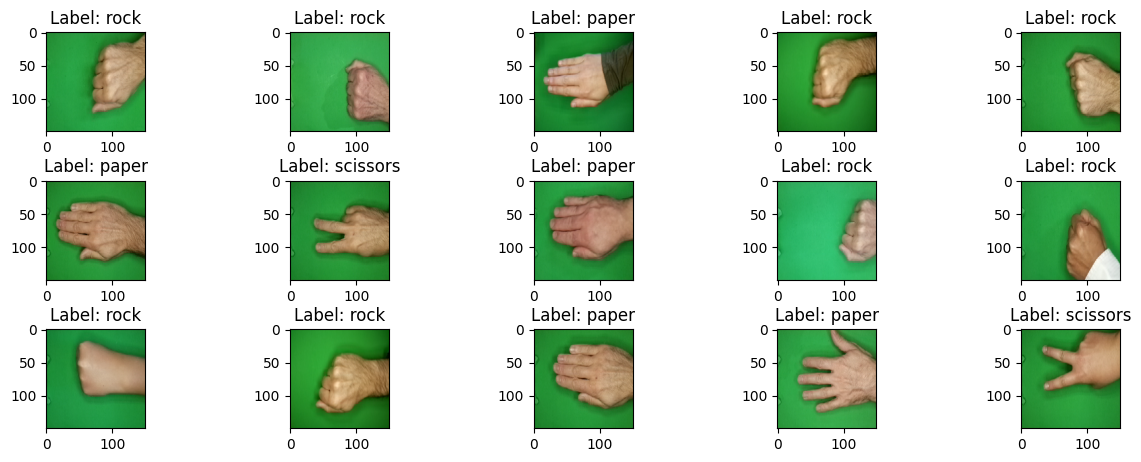

In [27]:
plt.figure(figsize=(15, 9))
n = 0
for i in range(15):
    n += 1
    plt.subplot(5, 5, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [28]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([712, 750, 726], dtype=int64))

### Splitting the images and labels into training and test set


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)
print(np.unique(y_train, return_counts=True),
      np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([609, 634, 616], dtype=int64)) (array([0, 1, 2]), array([103, 116, 110], dtype=int64))


### Applying Data Augmentation Techniques


In [31]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [33]:
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

### Defining the CNN Model


In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

### Compiling the model with its optimizer, loss function and metric


In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 512)               2

### Defining the callbacks for the model such as EarlyStopping and Best Model Checkpoint


In [37]:
filepath = "model_cnn_final.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
#                                             patience=3,
#                                             verbose=1,
#                                             factor=0.2,
#                                             min_lr=0.00001)

callbacks_list = [
    checkpoint,
    early_stopping,
    #         learning_rate_reduction
]

In [38]:
hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                           validation_data=testgen.flow(
                               X_test, y_test, batch_size=32),
                           epochs=50,
                           callbacks=callbacks_list)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4456\3791829490.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),


Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 1.4999 - accuracy: 0.3669
Epoch 1: val_accuracy improved from -inf to 0.44377, saving model to model_cnn_final.h5
59/59 [==============================] - 24s 217ms/step - loss: 1.4999 - accuracy: 0.3669 - val_loss: 0.9934 - val_accuracy: 0.4438
Epoch 2/50
59/59 [==============================] - ETA: 0s - loss: 0.9846 - accuracy: 0.4895
Epoch 2: val_accuracy improved from 0.44377 to 0.60182, saving model to model_cnn_final.h5
59/59 [==============================] - 13s 215ms/step - loss: 0.9846 - accuracy: 0.4895 - val_loss: 0.8627 - val_accuracy: 0.6018
Epoch 3/50
59/59 [==============================] - ETA: 0s - loss: 0.8934 - accuracy: 0.5966
Epoch 3: val_accuracy improved from 0.60182 to 0.72340, saving model to model_cnn_final.h5
59/59 [==============================] - 13s 210ms/step - loss: 0.8934 - accuracy: 0.5966 - val_loss: 0.7152 - val_accuracy: 0.7234
Epoch 4/50
59/59 [==============================] - 

In [39]:
model_saved = tf.keras.models.load_model('model_cnn_final.h5')

In [40]:
y_pred = model_saved.predict(X_test)
pred = np.argmax(y_pred, axis=1)
print(pred)

11/11 [==============================] - 0s 13ms/step
[0 0 2 2 2 2 2 2 2 0 1 2 2 2 0 1 1 2 2 0 0 1 1 0 0 2 0 0 1 1 0 2 2 0 2 1 2
 0 1 0 1 0 0 1 1 1 2 2 1 1 2 0 0 1 2 1 2 0 1 0 1 0 0 1 0 1 2 2 0 2 1 2 1 0
 2 1 2 1 1 0 0 2 1 1 1 1 2 2 0 2 2 1 2 1 0 1 2 2 1 2 1 0 0 2 1 1 1 1 2 2 0
 0 2 0 1 0 0 0 0 1 1 1 1 1 1 2 0 2 2 1 0 2 2 1 0 0 1 1 2 2 1 0 0 2 0 0 2 2
 2 1 0 0 1 2 0 2 2 2 2 0 2 2 2 0 1 1 0 0 1 0 2 2 2 2 1 2 1 1 0 1 1 2 2 2 2
 1 1 1 2 0 0 1 1 2 1 2 1 2 0 1 0 0 1 0 1 1 2 1 1 0 0 1 0 2 1 2 2 0 0 1 0 1
 2 2 0 0 0 0 2 1 0 2 1 2 1 1 1 0 0 1 0 1 0 0 0 1 1 2 1 1 1 1 1 2 2 1 1 0 2
 1 0 2 0 1 0 0 1 1 0 2 2 0 1 0 1 2 0 1 1 2 2 2 1 0 0 2 2 1 0 2 2 0 1 2 1 1
 0 2 2 2 1 2 0 1 0 0 1 1 0 1 2 1 2 2 0 0 0 0 2 1 0 2 0 1 1 2 0 2 2]


In [41]:
ground = np.argmax(y_test, axis=1)

### Classification Report of the model


In [42]:
from sklearn.metrics import classification_report

print(classification_report(ground, pred, target_names=labels))

              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       103
    scissors       1.00      1.00      1.00       116
        rock       1.00      1.00      1.00       110

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329

